# Project Title: Integrating Traditional Health Data and Simulated Wearable Device Metrics for Stroke Prediction
## Author: Ebelechukwu Chidimma Igwagu

### Problem Statement: 
Stroke is  aleading cause of mortality globally
 What is the likelihood of a patient having stroke or not based on the available **categorical** data from the patient records?

## Overview

This project comprises my analysis of the Kaggle Stroke dataset on 5,110 subjects which can be downloaded [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download). The dataset is made up of the following variables;

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient (years)
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Random number data Sythesis

The original dataset was further modified to incorporate three additional variables generated for smart watches. This was necessary to enhance the quality of the dataset as well as incorporate aspects of random number generation covered in the programming for data analytics module. The synthetic wearable smart watch variables are;

1) Resting heart rate	
2) Sleep duration
3) Step count

### Importing the necessary Libraries 

In [41]:
# import dependencies

import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #set seaborn as default style for plots when using matplotlib

In [42]:
# Import the machine learning Algorithms

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve



### Loading the Original Kaggle Stroke dataset

In [43]:
filepath = r'C:\Users\great\Desktop\ATU\Semester 2\PFDA\pfda_project\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filepath)

### Data Exploration

In [44]:
# Display the first 5 rows
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
# Display the last 5 row
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [46]:
# Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
# Summarize the dataset

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Cleaning 
### Dealing with missing values

The Body mass index(BMI)  column has 201 missing values and the distribution of these missing values was visualized to help understand the best method to be used in handling it. This showed a uniform distribution across the differnet variables. The height and age of a patient has been reported as a known factor that affects the bmi patient ([Holt *et al*, 2023](https://pmc.ncbi.nlm.nih.gov/articles/PMC10649148/)). The oldest population in the dataset comprise the highest proportion of the BMI missing value. Imputation using the mean BMI by age was used to fill out the missing values.


In [48]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [49]:
# Create a new dataframe with only the missing values
null_data = df[df.isnull().any(axis=1)]
null_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1


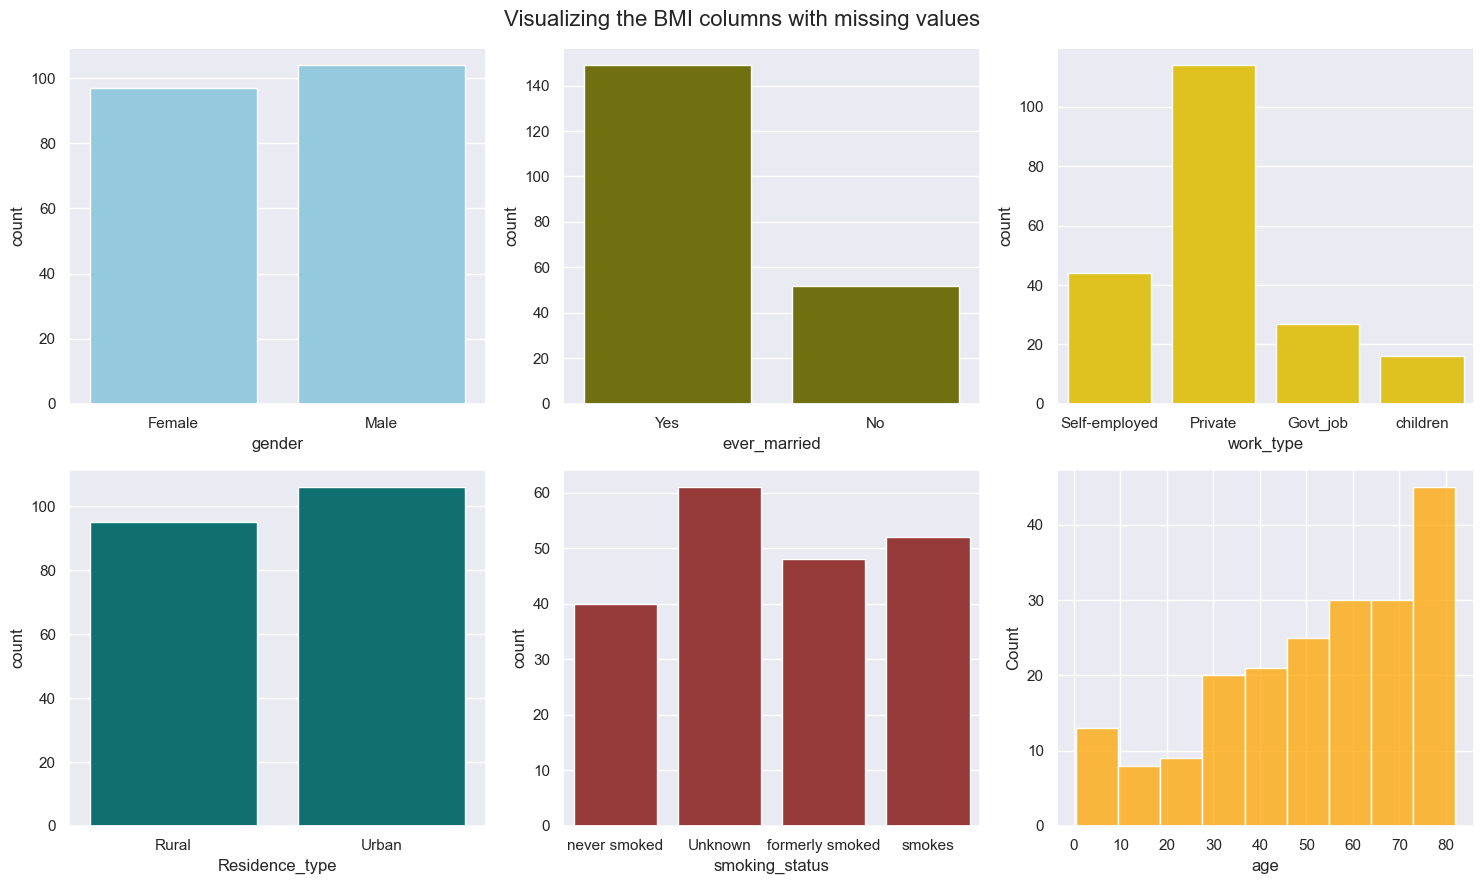

In [50]:
# Visualizing some of the variables in the BMI column with missing values
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Visualizing the BMI columns with missing values', fontsize=16)

# Plot the countplot and histogram
sns.countplot(data=null_data, x="gender", color="skyblue", ax=axs[0, 0])
sns.countplot(data=null_data, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=null_data, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=null_data, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=null_data, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=null_data, x="age", color="orange", ax=axs[1, 2])

# Adjust Layout
plt.tight_layout()
plt.show()

In [51]:
# Check for the frequency of each distinct age in the dataset
df['age'].value_counts()


age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [52]:
# Calculate the mean BMI for each age to 1 decimal place
age_mean_bmi = df.groupby('age')['bmi'].mean().round(1)
print (age_mean_bmi)

age
0.08     15.5
0.16     14.8
0.24     17.4
0.32     18.1
0.40     15.8
         ... 
78.00    27.9
79.00    27.9
80.00    28.8
81.00    28.0
82.00    28.0
Name: bmi, Length: 104, dtype: float64


In [53]:

# Replace missing BMIs with age specific mean BMI 
df['bmi'] = df['bmi'].fillna(df['age'].map(age_mean_bmi))

# Recheck for missing BMI values
df['bmi'].isnull().sum()


0

## Generating synthetic wearable device data to enhance the traditional healthdataset from kaggle.
Three commonly measured health metrics by smart watches; resting heart rate, sleep duration and step counts are the variables for the synthetic data. The data synthesis process involved researching medical publications to get population reference ranges for these variables. These reference ranges were used to calculate the mean and standard deviations all of which were utilized in defining the functions as to simulate data as close as possible to real health data. The numpy random module generation was used for this.


#### Disclaimer

Please note that the values from the synthesized wearable device data though factoring in medical research and publications does not make the data suitable for clinical and research purposes due to potential pitfalls in the data generation process.

In [54]:
# Define function for calculating the mean and SD from a reference range

def calculate_mean_std(low_limit, high_limit):
    mean = (low_limit + high_limit) / 2
    std_dev = (mean - low_limit) / 2
    return mean, std_dev

In [55]:
# Call the funtion for a reference range  60 - 100 beats per minute for resting heart rate
low_limit = 60
high_limit =100

mean, std_dev = calculate_mean_std(low_limit, high_limit)

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

Mean: 80.0, Standard Deviation: 10.0


In [56]:
# Set the random seed for reproducibility
np.random.seed(150)

### Reference range utilized for resting heart rate (RHR)

The mean and SDs were calculated with slight modifications and were used as conditions in the functions for the random data synthesis in beats per minute.

1. Infants (1 month-1 year): 80-160 bpm

2. Childhood (1-12 years): 75 - 130 bpm

3. Others ≥ 13 years): 60-100 bpm

4. Where hypertension == 1: > 80 bpm

These were modified from the Omron data available [here](https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age)

In [57]:
# Simulating Resting Heart Rate (RHR) 

def simulate_RHR(df):
    if df['age'] <= 1:
        RHR = np.random.normal(120, 20)  # using mean and SD for 1 year and below
    elif df['age'] > 1 and df['age'] <= 12:
      RHR = np.random.normal(90, 20)  # using mean and SD for > 1 to 12 years
    else:
       RHR = np.random.normal(80, 10)   # using mean and SD for > 12 years
    
    # Adjust for hypertension
    if df['hypertension'] == 1:
       RHR += np.random.uniform(5, 15) # higher RHR for patients with hypertension

   # Set realistic limits for RHR
       RHR = max(60, min(RHR, 200))
    
    return round(RHR, 1) # Rounds to 1 decimal place


### Reference range used for Sleep duration in hours

The mean and SDs were calculated with slight modifications and were used as conditions in the functions for the random data synthesis

1. 0 - 5 years = 10 - 17 hrs
2. 6 - 17 years = 8 - 11 hrs
3. ≥ 18 years = 7 - 9 hrs
4. Where stoke == 1 sleep duration < 7 hrs in the kaggle dataset

These ranges were modified from the National Sleep Duration(US) published [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/table/t1-nss-10-421/).

In [58]:
# Function to generate sleep duration based on age, stroke and BMI
def sleep_duration(df):
    if df['age'] <= 5:
        sleep_duration = np.random.normal(14, 2) # using mean and SD for 5 years and below
    elif df['age'] < 18:  # Covers ages from 6 to 17
        sleep_duration = np.random.normal(10, 1)  # using mean and SD for > 5 to 17 years 
    else:  # Age ≥ 18
        sleep_duration = np.random.normal(8, 1)  # using mean and SD for 18 years and above

    # generate sleep duration < 7 hours for stroke patient
    if df['stroke'] == 1:
        sleep_duration = np.random.normal(5, 1) 

    # Adjust for higher BMI
    if df['bmi'] > 30:  # Obesity class
        sleep = np.random.normal(6, 1)  
    
    # Set sleep limit for all conditions
    return round(max(3, min(sleep_duration, 18)), 1)



### BMI Classification

These BMI ranges were used for defining the conditions in the functions for the step count random data synthesis

|  S/N |BMI Category     |      BMI Range (kg/m2)  |
|------|-----------------|-------------------------|
|1. | Underweight     |       Less than 18.5    |
|2. | Healthy Weight  |        18.5 to less than 25 |
|3. | Overweight      |        25 to less than 30   |
|4. | Obesity         |        30 or greater        |
|5. | Class 1 Obesity |       30 to less than 35    |
|6. | Class 2 Obesity |        35 to less than 40   |
|7. | Class 3 Obesity(Severe Obesity)| 40 or greater |

This classification can be accessed [here](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html)

In [59]:
# Function to generate average daily step count based on BMI, stroke and hypertension

def generate_step_count(df):
    # Step Count Baseline (Realistic Estimates)
    if df['age'] < 18:
        base_steps = np.random.normal(12000, 2000)  # children & teens
    elif df['age'] < 40:
        base_steps = np.random.normal(10000, 1500)  # Young adults
    elif df['age'] < 60:
        base_steps = np.random.normal(8000, 1200)   # Middle-aged adults
    else:
        base_steps = np.random.normal(6000, 1000)   # Older adults

    # Adjust for BMI (Proportional Reduction)
    if df['bmi'] >= 35:  # Severe Obesity
        base_steps *= np.random.uniform(0.5, 0.7)  # Reduce 30-50%
    elif df['bmi'] >= 30:  # Obese
        base_steps *= np.random.uniform(0.7, 0.85)  # Reduce 15-30%
    elif df['bmi'] >= 25:  # Overweight
        base_steps *= np.random.uniform(0.85, 0.95)  # Reduce 5-15%

    # Adjust for Hypertension (Slight Reduction)
    if df['hypertension'] == 1:
        base_steps *= np.random.uniform(0.75, 0.9)  # Reduce 10-25%

    # Adjust for Stroke (Significant Reduction)
    if df['stroke'] == 1:
        base_steps *= np.random.uniform(0.3, 0.5)  # Reduce 40-60%

    # Ensure realistic step count bounds (500 - 14,000)
    return round(np.clip(base_steps, 500, 14000))


In [60]:
# Apply the functions to the Dataframe

df['resting_heart_rate'] = df.apply(simulate_RHR, axis=1)
df['sleep_duration'] = df.apply(sleep_duration, axis=1)
df['step_count'] = df.apply(generate_step_count, axis=1)


# Save data to database

In [61]:
# Save the new dataset
df.to_csv('healthcare_wearable_data.csv', index=False)

### Loading the merged dataset

In [62]:
data_path = r'C:\Users\great\Desktop\ATU\Semester 2\PFDA\pfda_project\healthcare_wearable_data.csv'
merged_data = pd.read_csv(data_path)

### Data Exploration

In [63]:
# Display the first 5 rows
merged_data.head(5) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,77.7,3.4,903
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.2,never smoked,1,83.9,4.8,2403
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,83.6,4.6,1603
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,85.7,3.9,2206
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,96.2,5.8,2211


In [64]:
# Display the last 5 rows
merged_data.tail(5) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.8,never smoked,0,80.5,7.9,3047
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,101.9,8.2,3122
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,78.5,7.1,6938
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,88.7,9.1,7143
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,72.5,8.1,5116


In [65]:
#Display information about the dataset
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   gender              5110 non-null   object 
 2   age                 5110 non-null   float64
 3   hypertension        5110 non-null   int64  
 4   heart_disease       5110 non-null   int64  
 5   ever_married        5110 non-null   object 
 6   work_type           5110 non-null   object 
 7   Residence_type      5110 non-null   object 
 8   avg_glucose_level   5110 non-null   float64
 9   bmi                 5110 non-null   float64
 10  smoking_status      5110 non-null   object 
 11  stroke              5110 non-null   int64  
 12  resting_heart_rate  5110 non-null   float64
 13  sleep_duration      5110 non-null   float64
 14  step_count          5110 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 599.0+

In [66]:
# Summary statistics
merged_data.describe() 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,resting_heart_rate,sleep_duration,step_count
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.918258,0.048728,82.488219,8.420528,7163.724658
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.729710,0.215320,13.049009,2.035520,3008.584213
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,36.700000,3.000000,657.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000,74.400000,7.300000,4923.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000,81.500000,8.200000,6701.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,89.100000,9.100000,9244.500000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,161.300000,18.000000,14000.000000


### Data Cleaning and pre-processing

In [67]:
# Dropping the id column as it is not relevant
merged_data.drop('id', inplace=True, axis=1)

In [68]:
merged_data.isnull().sum()  # Check for missing values

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
resting_heart_rate    0
sleep_duration        0
step_count            0
dtype: int64

### Data Visualization
#### Univariate Analysis by Stroke status


This compares each of the relevant variables to the main variable of interest "Stroke" to derive useful insights. Insight for this was derived from a similar analysis that can be accessed [here](https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/).

1. Categorical Variables: gender, work_type, smoking_status
2. Numerical Variables: age, hypertension, heart_disease, ever_married,   Residence_type, avg_glucose_level,  bmi,  stroke, resting_heart_rate, sleep_duration, step_count 



In [69]:
cat_var = merged_data[['gender', 'hypertension', 'heart_disease', 'work_type','ever_married', 'Residence_type', 'smoking_status', 'stroke']]
num_var = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']]

### Categorical Variables Univariate Analysis Plot Insights

It can be deduced from the countplots below that there is a slight imbalance in the gender, ever married and work type of the subjects in the dataset. The female gender, married subjects and those working in the private sector made up a huge proportion of the total population. Despite this, there is a higher incidence of stroke among the married subjects, those working in the private sector while the subject's gender, residence type, smoking status shows no rsuch elationship with the stroke status. Only a small proportion of the population has stroke, hypertension and heart disease making it difficult to deduce the impact from the plots.

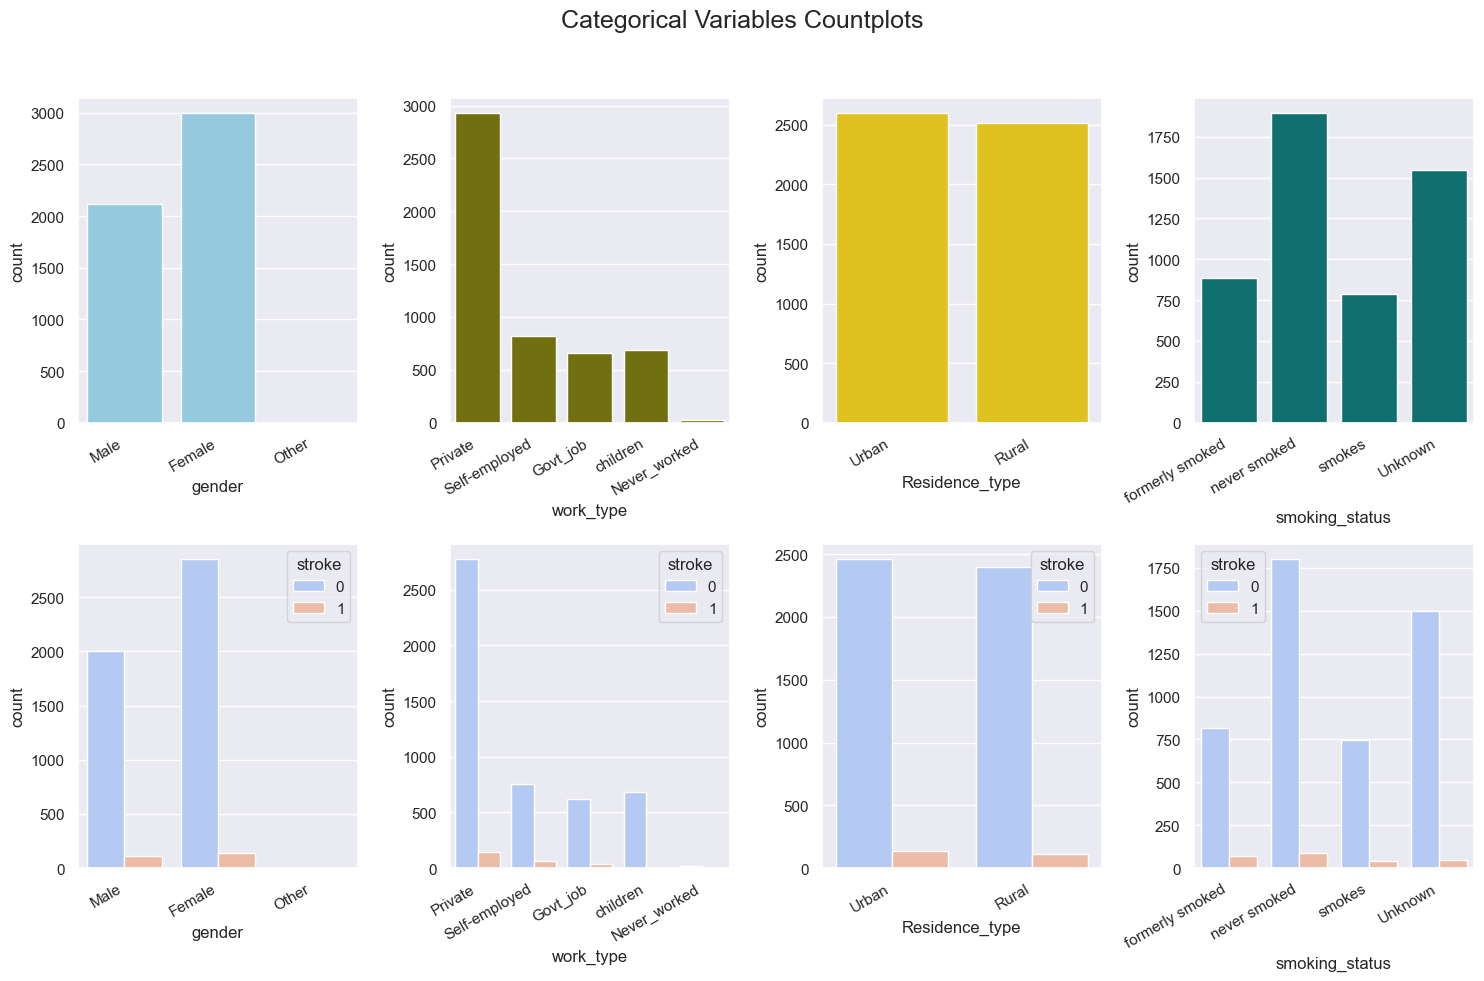

In [70]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='Residence_type', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='smoking_status', color='teal', ax=axs[0, 3])


# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette='coolwarm', ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette='coolwarm', ax=axs[1, 1])
sns.countplot(data=merged_data, x='Residence_type', hue='stroke', palette='coolwarm', ax=axs[1, 2])
sns.countplot(data=merged_data, x='smoking_status', hue='stroke', palette='coolwarm', ax=axs[1, 3])


# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


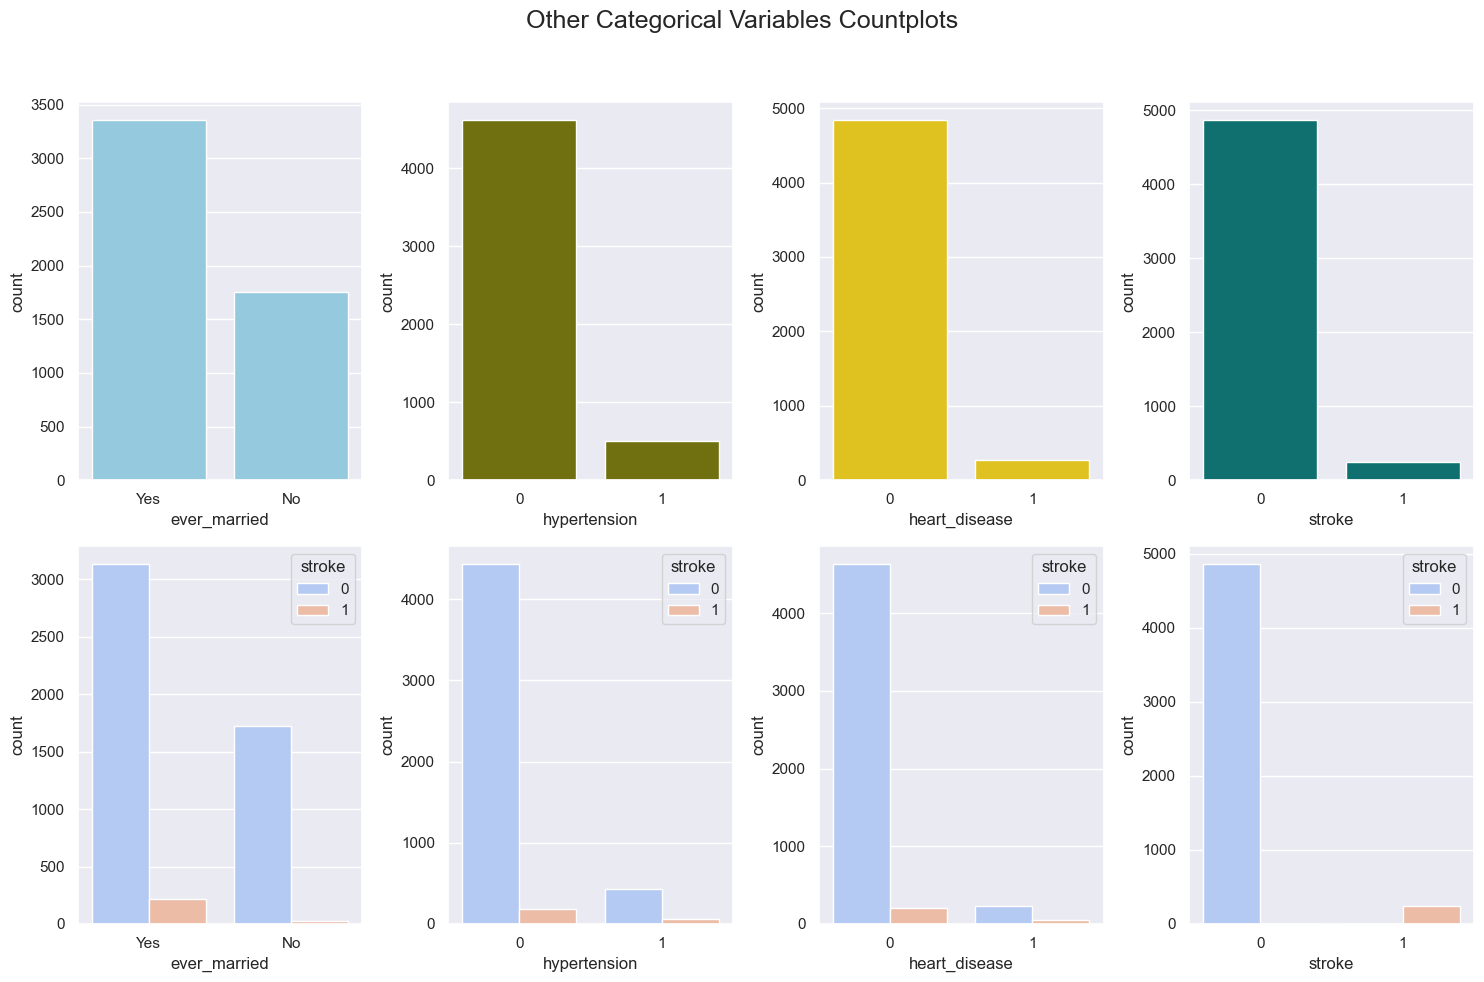

In [71]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Other Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='ever_married', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='hypertension', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='heart_disease', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='stroke', color='teal', ax=axs[0, 3])


# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='ever_married', hue='stroke', palette='coolwarm', ax=axs[1, 0])
sns.countplot(data=merged_data, x='hypertension', hue='stroke', palette='coolwarm', ax=axs[1, 1])
sns.countplot(data=merged_data, x='heart_disease', hue='stroke', palette='coolwarm', ax=axs[1, 2])
sns.countplot(data=merged_data, x='stroke', hue='stroke', palette='coolwarm', ax=axs[1, 3])


# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


### Numerical Variables Univariate and Bivariate Analysis Plot Insights

The numeric variables ahowed a normal distribution with a higher incidence of stroke observed in the elderly subjects above 60 years of age with a few outliers. The population with very high average glucose concentration also showed a higher incidence of stroke. A significantly lower sleep duration and step counts was observed in the subjects with stroke compared to the rest of the population. No significant difference in BMI and resting heart rate was noted in those with or without stroke.


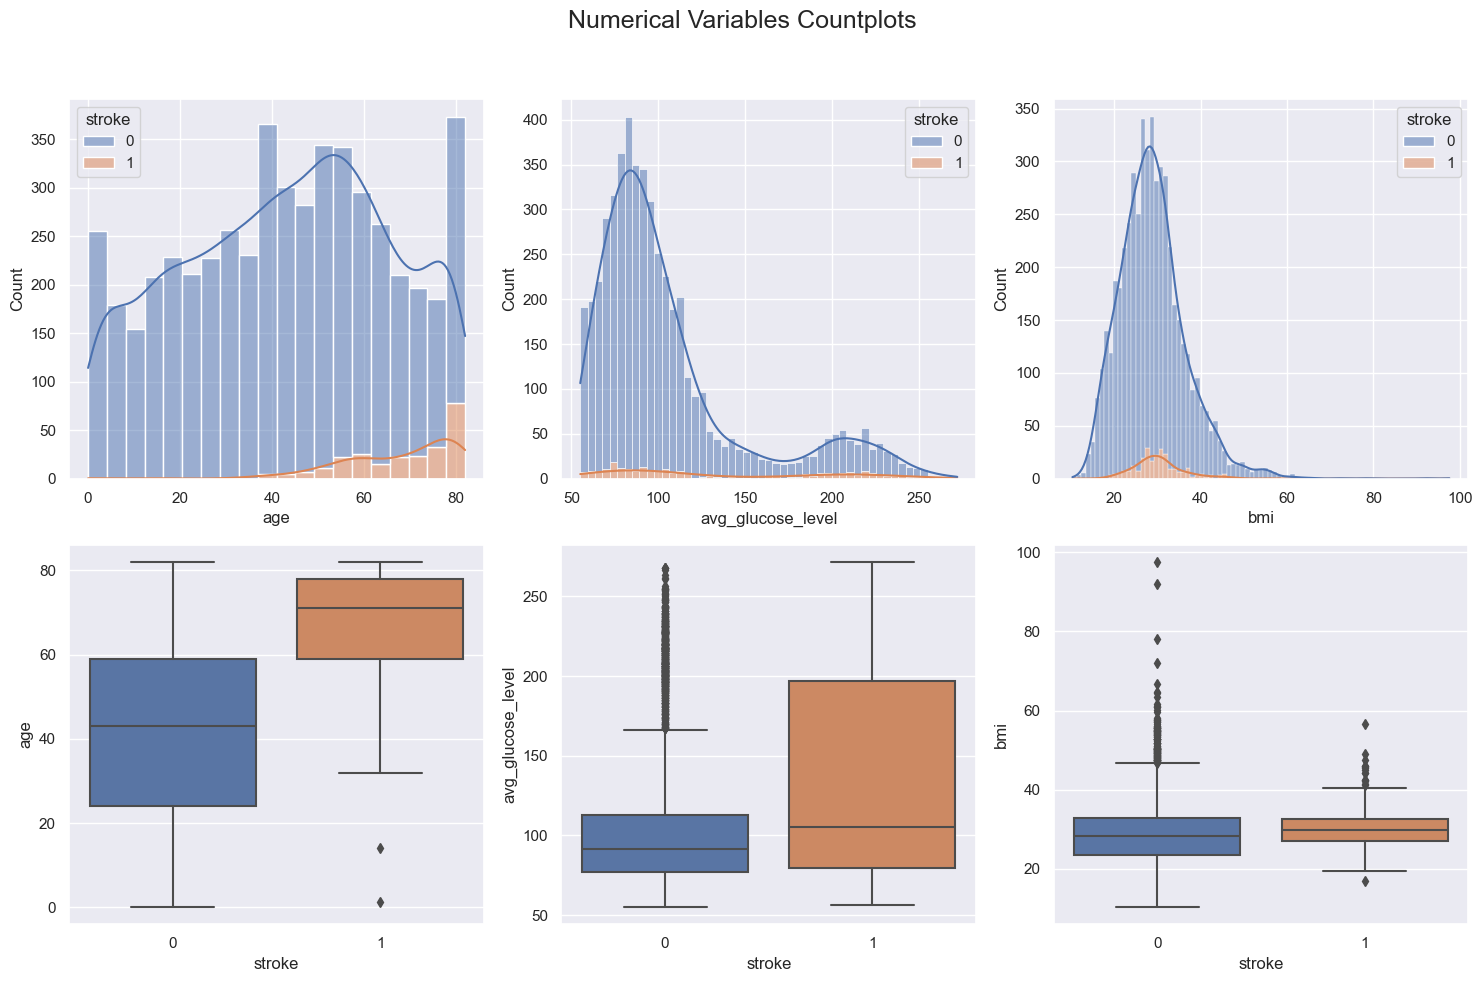

In [87]:
# Create Subplots 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Numerical Variables Countplots', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data,kde=True, x='age', hue='stroke', multiple='stack', ax=axs[0, 0])
sns.histplot(data=merged_data,kde=True, x='avg_glucose_level', multiple='stack', hue='stroke', ax=axs[0, 1])
sns.histplot(data=merged_data,kde=True, x='bmi', hue='stroke', multiple='stack', ax=axs[0, 2])


# Second row:Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='age', ax=axs[1, 0])
sns.boxplot(data=merged_data, x='stroke', y='avg_glucose_level', ax=axs[1, 1])
sns.boxplot(data=merged_data, x='stroke', y='bmi', ax=axs[1, 2])

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


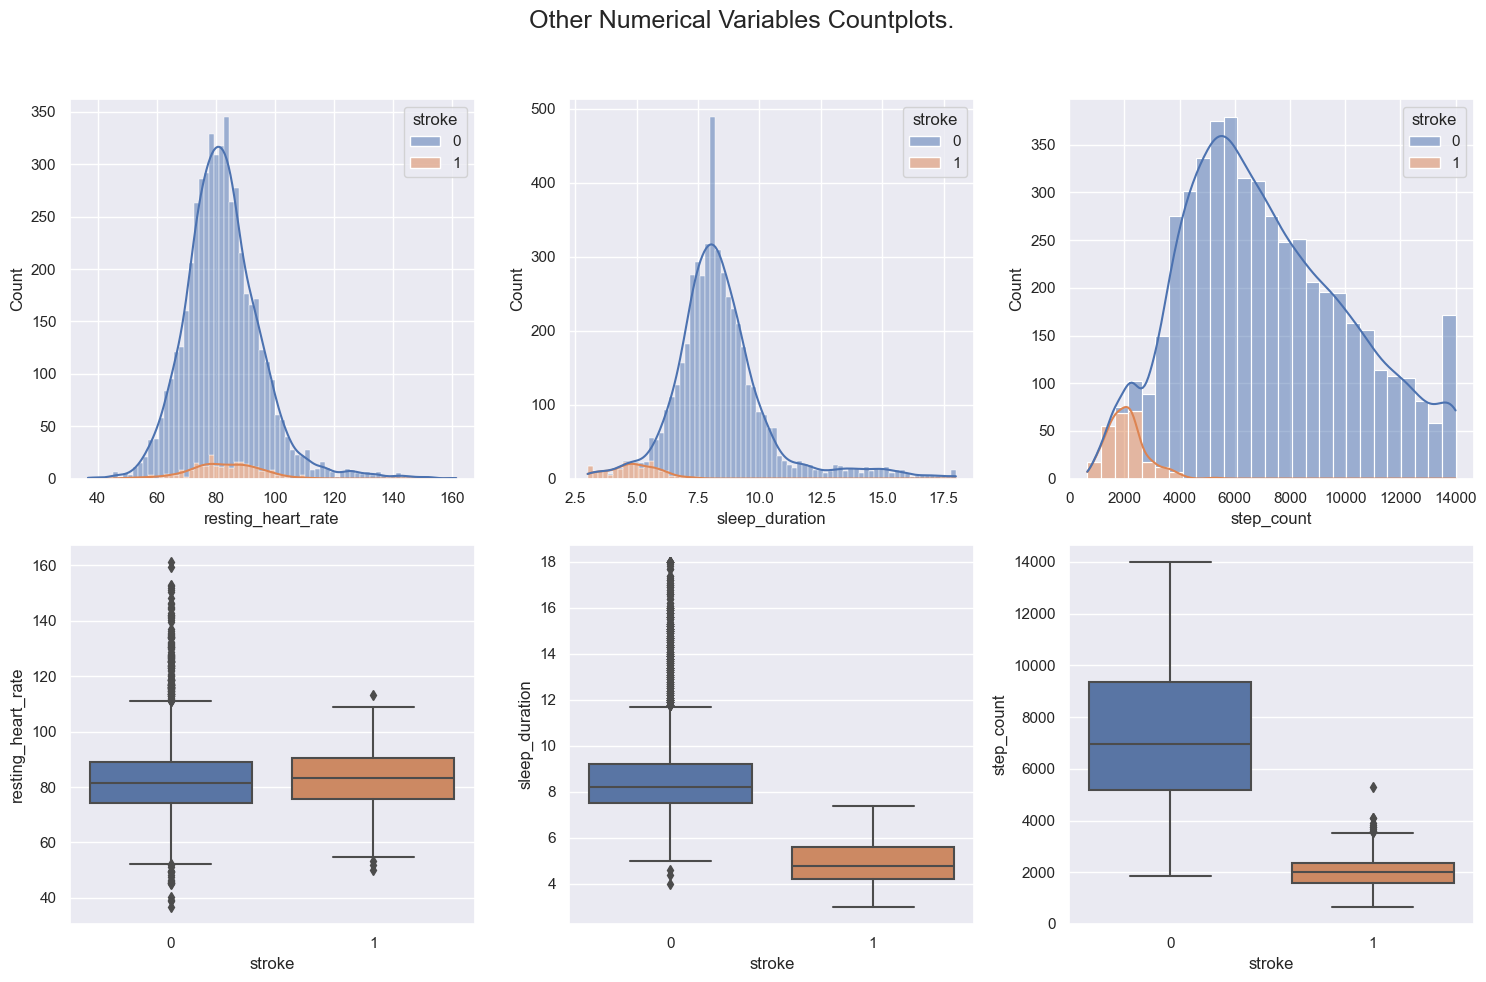

In [88]:

# Create Subplots 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Other Numerical Variables Countplots.', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data,kde=True, x='resting_heart_rate', hue='stroke', multiple='stack', ax=axs[0, 0])
sns.histplot(data=merged_data,kde=True, x='sleep_duration', hue='stroke', multiple='stack', ax=axs[0, 1])
sns.histplot(data=merged_data,kde=True, x='step_count', hue='stroke', multiple='stack', ax=axs[0, 2])


# Second row:Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='resting_heart_rate', ax=axs[1, 0])
sns.boxplot(data=merged_data, x='stroke', y='sleep_duration', ax=axs[1, 1])
sns.boxplot(data=merged_data, x='stroke', y='step_count', ax=axs[1, 2])


# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


## Multivariate Analysis
The relationship between the continuous variables were explored using pairplot and correlation analysis.

In [82]:
numeric_cols = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']]


### Pair Plot for Exploring Relationships
Use a pair plot to visualize relationships between all continuous variables in the dataset.

In [ ]:
# Correlation Analysis

# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(num_var.corr(), annot=True, fmt='.2f')

# Add a title
plt.title('Correlation Heatmap for Stroke Prediction', fontsize=16)

# Show the plot
plt.show()

## Machine Learning

### Feature Engineering

#### Label Encoding

Label encoding is a machine learning technique used to convert categorical variables into numerical variables which is required for most machine learning algorithms([Otten, 2023](https://medium.com/@neri.vvo/label-encoding-in-python-practical-guide-and-tutorial-816cfb16f5e7)). The scikitlearn label encoder will be used for the bi-class categorical variables "ever married" and "residence type". 

In [74]:
# Check for the unique values in the categorical variables and the frequency
for col in ['gender', 'work_type', 'ever_married', 'Residence_type', 'smoking_status']:
    print(f"Value Counts for {col}:\n{merged_data[col].value_counts()}\n")


Value Counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value Counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value Counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value Counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value Counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



In [75]:
# Encoding the bi-class categorical variables
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encoding ever_married 
merged_data['ever_married_Encoded'] = label_encoder.fit_transform(merged_data['ever_married'])

# Encoding Residence_type (Urban/Rural → 1/0)
merged_data['Residence_type_Encoded'] = label_encoder.fit_transform(merged_data['Residence_type'])

In [76]:
merged_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,resting_heart_rate,sleep_duration,step_count,ever_married_Encoded,Residence_type_Encoded
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,77.7,3.4,903,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.2,never smoked,1,83.9,4.8,2403,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,83.6,4.6,1603,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,85.7,3.9,2206,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,96.2,5.8,2211,1,0


#### One Hot Encoding
One hot encoding on the other hand converts each category under the categorical variables into a binary format and creates a separate column for each. This is useful for multi-class categorical variables because it eliminates ordinality, improves model performance and ideal for machine learning algorithm as described [here](GeeksforGeeks (2024) One hot encoding in machine learning. https://www.geeksforgeeks.org/ml-one-hot-encoding/.).
One hot encoding was used to fit and transform the gender, work type and smoking status variables into binary format.

In [78]:
# Encoding the multi-class categorical variables
cat_cols = merged_data[['gender', 'work_type', 'smoking_status']]

# Initialize OHE
ohe = OneHotEncoder(drop='first', sparse_output=False) 

# Fit and transform the data
encoded = ohe.fit_transform(cat_cols)

# Save to a dataframe
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

# Merge with original dataframe
merged_data = pd.concat([merged_data, encoded_df], axis=1)

# Drop original categorical columns
merged_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)


In [79]:
merged_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,resting_heart_rate,sleep_duration,step_count,ever_married_Encoded,Residence_type_Encoded,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,77.7,3.4,903,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,30.2,1,83.9,4.8,2403,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,83.6,4.6,1603,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,85.7,3.9,2206,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,96.2,5.8,2211,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Correlation Analysis
### Create a heatmap with the correlation matrix

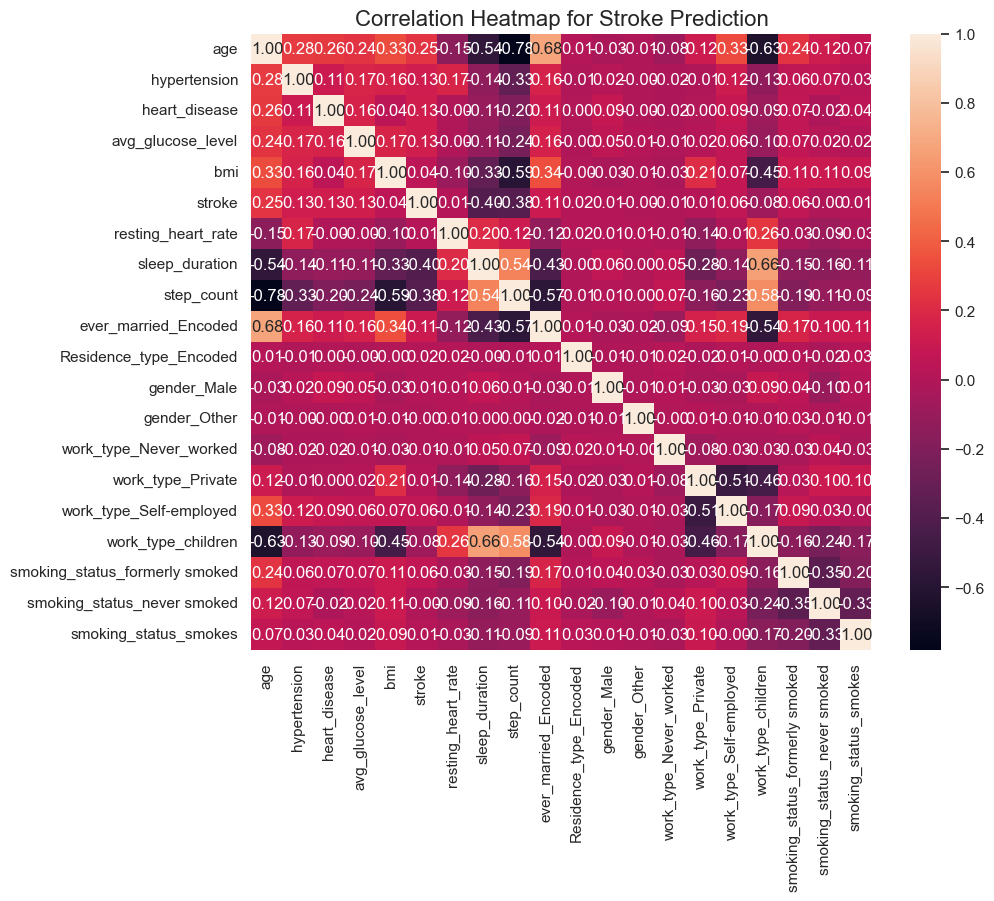

In [80]:
# Correlation Analysis
# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(merged_data.corr(), annot=True, fmt='.2f')

# Add a title
plt.title('Correlation Heatmap for Stroke Prediction', fontsize=16)

# Show the plot
plt.show()

## Summary

Factors that can predispose an individual to stroke inludes old age, high glucose concentration, lower step count and lower sleeping duration
- work - stress

## References
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
- https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/
- https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828
- https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/table/t1-nss-10-421/
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6267703/
- Holt, P.R., Altayar, O. and Alpers, D.H. (2023) 'Height with Age Affects Body Mass Index (BMI) Assessment of Chronic Disease Risk,' Nutrients, 15(21), p. 4694. https://doi.org/10.3390/nu15214694.
- Van Otten, N. (2024) 'Label encoding in Python: practical guide and tutorial,' Medium, 28 August. https://medium.com/@neri.vvo/label-encoding-in-python-practical-guide-and-tutorial-816cfb16f5e7.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828
- GeeksforGeeks (2024) One hot encoding in machine learning. https://www.geeksforgeeks.org/ml-one-hot-encoding/.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html